<a href="https://colab.research.google.com/github/cho-jr/2020_cphys2/blob/master/hw_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow import keras
from keras import models
from keras import layers
import matplotlib.pyplot as plt

from keras.datasets import imdb

(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [7]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 2s 13ms/step - loss: 0.5677 - acc: 0.6953 - val_loss: 0.3758 - val_acc: 0.8598
Epoch 2/5
118/118 [==============================] - 1s 11ms/step - loss: 0.3559 - acc: 0.8615 - val_loss: 0.2755 - val_acc: 0.8896
Epoch 3/5
118/118 [==============================] - 1s 11ms/step - loss: 0.2647 - acc: 0.9038 - val_loss: 0.2766 - val_acc: 0.8887
Epoch 4/5
118/118 [==============================] - 1s 11ms/step - loss: 0.2128 - acc: 0.9271 - val_loss: 0.2759 - val_acc: 0.8886
Epoch 5/5
118/118 [==============================] - 1s 11ms/step - loss: 0.1751 - acc: 0.9393 - val_loss: 0.3226 - val_acc: 0.8826


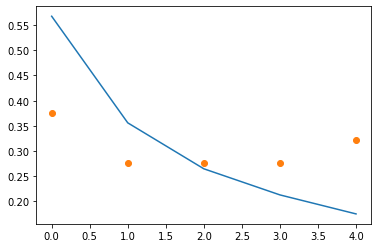

In [9]:

val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [10]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3401 - acc: 0.8735


#  IMDB Classification using simple RNN

In [11]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [12]:
X_train[0]

array([1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,   14,
        407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,  256,
          4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,  476,
         26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,   88,
          4,  381,   15,  297,   98,   32, 2071,   56,   26,  141,    6,
        194, 7486,   18,    4,  226,   22,   21,  134,  476,   26,  480,
          5,  144,   30, 5535,   18,   51,   36,   28,  224,   92,   25,
        104,    4,  226,   65,   16,   38, 1334,   88,   12,   16,  283,
          5,   16, 4472,  113,  103,   32,   15,   16, 5345,   19,  178,
         32], dtype=int32)

In [62]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16))
rnn.add(layers.SimpleRNN(32, activation='relu', dropout=0.2, return_sequences='True'))
rnn.add(layers.Dropout(0.3))
rnn.add(layers.SimpleRNN(16, activation='relu', dropout=0.2, return_sequences='True'))
rnn.add(layers.Dropout(0.3))
rnn.add(layers.SimpleRNN(16, activation='relu', dropout=0.2, ))
rnn.add(layers.Dropout(0.3))
rnn.add(layers.Dense(1, activation='sigmoid'))
rnn.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['acc'])

In [63]:
rnn.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, None, 32)          1568      
_________________________________________________________________
dropout_12 (Dropout)         (None, None, 32)          0         
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, None, 16)          784       
_________________________________________________________________
dropout_13 (Dropout)         (None, None, 16)          0         
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, 16)                528       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)               

In [64]:
history = rnn.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
137/137 [==============================] - 13s 97ms/step - loss: 0.6930 - acc: 0.5055 - val_loss: 0.6907 - val_acc: 0.5639
Epoch 2/10
137/137 [==============================] - 13s 95ms/step - loss: 0.6717 - acc: 0.5810 - val_loss: 0.6040 - val_acc: 0.6876
Epoch 3/10
137/137 [==============================] - 13s 93ms/step - loss: 0.5057 - acc: 0.7647 - val_loss: 0.4066 - val_acc: 0.8164
Epoch 4/10
137/137 [==============================] - 13s 96ms/step - loss: 0.3716 - acc: 0.8461 - val_loss: 0.3545 - val_acc: 0.8428
Epoch 5/10
137/137 [==============================] - 13s 95ms/step - loss: 0.3131 - acc: 0.8779 - val_loss: 0.3549 - val_acc: 0.8439
Epoch 6/10
137/137 [==============================] - 13s 95ms/step - loss: 0.2651 - acc: 0.9002 - val_loss: 0.3577 - val_acc: 0.8476
Epoch 7/10
137/137 [==============================] - 13s 94ms/step - loss: 0.2337 - acc: 0.9120 - val_loss: 0.3754 - val_acc: 0.8476
Epoch 8/10
137/137 [==============================] - 13s 94ms

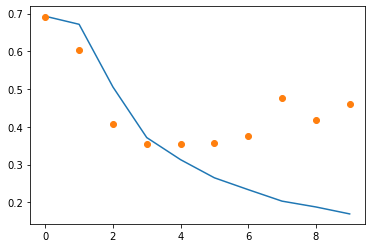

In [65]:
val_dict = history.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0, len(loss))

plt.plot(x, loss, '-')
plt.plot(x, val_loss, 'o')

In [67]:
rnn.evaluate(X_test, y_test)

782/782 [==============================] - 9s 11ms/step - loss: 0.4824 - acc: 0.8343


[0.4823593497276306, 0.8342800140380859]

RNN이 다층 신경망보다 정확도를 높이는 적절한 조건을 찾기 어려웠다. simple RNN activation function의 기본값은 tanh였으나 acc가 0.7 미만을 맴돌아서 relu로 바꿔주었더니 소폭 상승했다. loss 또한 RNN이 더 크다.